Example systems

$$ m\ddot{x}+c\dot{x}+kx=u\left(t\right) $$

In [1]:
import numpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [22]:
# %load pyRK4.py
"""
Created on Mon Mar 17 17:20:35 2014

@author: tai
- set the convention that output argument is always the last for fu,fdx,fy
 - fu,fy syntax changed
"""

try:
    del RK4
except:
    pass

def stateDerivative(t,x,u,fu,fdx,px,pu,dx):   
    fu(t,x,pu,u)
    fdx(t,x,u,px,dx)


def RK4(fdx,fu,fy,x0,tv,xv,uv,yv,px,pu,py,nx,nu,ny,nt):
    """
    fdx     :      state derivative function
                   fdx(t,x,u,px,dx)
    fu      :      input function
    fy      :      output function
    x0      :      initial state vector
    tv      :      time vectors to obtain solution at
    xv      :      storage for solution states
    yv      :      storage for solution outputs
    px      :      extra argumens(parameters) for state derivative fdx
    pu      :      extra argumens(parameters) for output function fy
    py      :      extran arguments(parameters) for output function fy    
    """

    a = numpy.array([ 
            [0.0, 0.0, 0.0, 0.0] ,  
            [1.0/2.0,0.0,0.0,0.0] , 
            [0.0,1.0/2.0,0.0,0.0] , 
            [0.0,0.0,1.0,0.0] ], numpy.float64)
    b = numpy.array([ 1.0/6.0, 1.0/3.0, 1.0/3.0, 1.0/6.0 ], numpy.float64)
    c = numpy.array([ 0.0, 1.0/2.0, 1.0/2.0, 1.0 ], numpy.float64)
    
    x = numpy.zeros_like(x0)
    u = numpy.empty((nu,), x0.dtype)
    y = numpy.empty((ny,), x0.dtype)
    k = numpy.zeros((nx,4), x0.dtype)
    
    print "u.size", u.shape
    print "x.size", x.shape
    print "y.size", y.shape
    
    """
    if False:
        xv = numpy.zeros((nx,nt), x0.dtype)
        uv = numpy.zeros((nu,nt), x0.dtype)
        yv = numpy.zeros((ny,nt), x0.dtype)
    else:
        xv.resize((nx,nt))
        uv.resize((nu,nt))
        yv.resize((ny,nt))
    """

    t = tv[0]
    print "x, x0 ids before = ",id(x),id(x0)    
    x = x0*1.0  # 
    print "x, x0 ids after  = ",id(x),id(x0)

    fu(t,x,pu,u)
    fdx(t,x,u,px,dx)
    fy(t,x,dx,u,px,pu,py,y)

    print "xv.shape",xv.shape
    xv[:,0] = x
    uv[:,0] = u
    yv[:,0] = y

    for m in range(nt-1):
        dt = tv[m+1]-tv[m]

        deltax = 0    # ! better to use vector of size nx??
        for i in range(4):
            xstage = x*1.0
            for j in range(i):
                xstage = xstage+dt*a[i,j]*k[:,j]
            # def stateDerivative(t,x,u,fu,fdx,px,pu,dx):   
            stateDerivative(t+c[i]*dt, xstage, u, fu, fdx, px, pu, k[:,i])
            deltax = deltax + dt*b[i]*k[:,i]
   
        x = x + deltax
        t = t + dt
        
        #print "u.size", u.shape
        #print "x.size", x.shape
        #print "y.size", y.shape        
        fu(t,x,pu,u)
        fdx(t,x,u,px,dx)
        fy(t,x,dx,u,px,pu,py,y)

        xv[:,1+m] = x
        uv[:,1+m] = u
        yv[:,1+m] = y

In [37]:
print range(0),range(1),range(2)
print '_'*19
for i in range(0):
    print i
print '_'*19
for i in range(1):
    print i
print '_'*19
for i in range(2):
    print i
print '_'*19

[] [0] [0, 1]
___________________
___________________
0
___________________
0
1
___________________


In [24]:
def fdx1(t,x,u,px,dx):
    m = px[0]
    c = px[1]
    k = px[2]
    dx[0] = x[1]
    dx[1] = (u[0]-c*x[1]-k*x[0])/m
    
    
def fu1(t,x,pu,u):
    freq = pu[0]
    u = numpy.sin(freq*t)
    
def fy1(t,x,dx,u,px,pu,py,y):
    y[0] = x[0]   # position
    y[1] = x[1]   # velocity
    y[2] = dx[1]  # acceleration
    y[3] = 0.5*px[0]*x[1]**2  # kinetic energy
    

# check column assignment works or not 

In [25]:
k = numpy.zeros((2,4), numpy.float64)
dx = numpy.zeros((2,), numpy.float64)

In [26]:
fdx1(0., [0.1, 0.2], [1.], [1., 2., 3.], dx)
fdx1(0., [0.1, 0.2], [1.], [1., 2., 3.], k[:,0])

In [27]:
print dx
print k

[ 0.2  0.3]
[[ 0.2  0.   0.   0. ]
 [ 0.3  0.   0.   0. ]]


# test integrator on SMD

In [28]:
tv = numpy.arange(0,10,0.01, numpy.float64)
nt = len(tv)
nx = 2
nu = 1
ny = 4
px = numpy.array([1., 1., 3.], numpy.float64)
pu = numpy.array([0.5], numpy.float64)
py = numpy.array([], numpy.float64)
x0 = numpy.array([1., 0.5], numpy.float64)
xv = numpy.empty([nx,nt], numpy.float64)
yv = numpy.empty([ny,nt], numpy.float64)
uv = numpy.empty([nu,nt], numpy.float64)
RK4(fdx1,fu1,fy1,x0,tv,xv,uv,yv,px,pu,py,nx,nu,ny,nt)

u.size (1,)
x.size (2,)
y.size (4,)
x, x0 ids before =  140129071705504 140129030890080
x, x0 ids after  =  140129001433408 140129030890080
xv.shape (2, 1000)


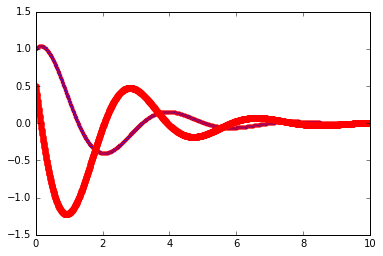

In [29]:
plt.plot(tv,yv[0,:],'.-',tv,yv[1,:],'or',mec='r')

# Maple Solution to SMD

generic solution obtained in MAPLE is

$$ x \left( t \right) =1/2\,{\frac {\sqrt {{c}^{2}-4\,km}{\it x0}+c{\it 
x0}+2\,{\it dx0}\,m}{\sqrt {{c}^{2}-4\,km}}{{\rm e}^{1/2\,{\frac {
 \left( -c+\sqrt {{c}^{2}-4\,km} \right) t}{m}}}}}-1/2\,{\frac {-
\sqrt {{c}^{2}-4\,km}{\it x0}+c{\it x0}+2\,{\it dx0}\,m}{\sqrt {{c}^{2
}-4\,km}}{{\rm e}^{-1/2\,{\frac { \left( c+\sqrt {{c}^{2}-4\,km}
 \right) t}{m}}}}}+{\frac {1}{\sqrt {{c}^{2}-4\,km}} \left( \int_{0}^{
t}\!u \left( {\it \_z1} \right) {{\rm e}^{-1/2\,{\frac { \left( -c+
\sqrt {{c}^{2}-4\,km} \right) {\it \_z1}}{m}}}}\,{\rm d}{\it \_z1}{
{\rm e}^{{\frac {t\sqrt {{c}^{2}-4\,km}}{m}}}}-\int_{0}^{t}\!u \left( 
{\it \_z1} \right) {{\rm e}^{1/2\,{\frac { \left( c+\sqrt {{c}^{2}-4\,
km} \right) {\it \_z1}}{m}}}}\,{\rm d}{\it \_z1} \right) {{\rm e}^{-1/
2\,{\frac { \left( c+\sqrt {{c}^{2}-4\,km} \right) t}{m}}}}}$$

solution with $u=sin(\frac{1}{2}t)$ is

$$x \left( t \right) =1/2\,{\frac {4\,\sqrt {{c}^{2}-4\,km}{c}^{2}{\it 
x0}+16\,\sqrt {{c}^{2}-4\,km}{k}^{2}{\it x0}-8\,\sqrt {{c}^{2}-4\,km}k
m{\it x0}+\sqrt {{c}^{2}-4\,km}{m}^{2}{\it x0}+4\,{c}^{3}{\it x0}+8\,{
c}^{2}{\it dx0}\,m+16\,c{k}^{2}{\it x0}-8\,ckm{\it x0}+c{m}^{2}{\it x0
}+32\,{\it dx0}\,{k}^{2}m-16\,{\it dx0}\,k{m}^{2}+2\,{\it dx0}\,{m}^{3
}+8\,\sqrt {{c}^{2}-4\,km}c+8\,{c}^{2}-16\,km+4\,{m}^{2}}{ \left( 4\,{
c}^{2}+16\,{k}^{2}-8\,km+{m}^{2} \right) \sqrt {{c}^{2}-4\,km}}{
{\rm e}^{1/2\,{\frac { \left( -c+\sqrt {{c}^{2}-4\,km} \right) t}{m}}}
}}-1/2\,{\frac {-4\,\sqrt {{c}^{2}-4\,km}{c}^{2}{\it x0}-16\,\sqrt {{c
}^{2}-4\,km}{k}^{2}{\it x0}+8\,\sqrt {{c}^{2}-4\,km}km{\it x0}-\sqrt {
{c}^{2}-4\,km}{m}^{2}{\it x0}+4\,{c}^{3}{\it x0}+8\,{c}^{2}{\it dx0}\,
m+16\,c{k}^{2}{\it x0}-8\,ckm{\it x0}+c{m}^{2}{\it x0}+32\,{\it dx0}\,
{k}^{2}m-16\,{\it dx0}\,k{m}^{2}+2\,{\it dx0}\,{m}^{3}-8\,\sqrt {{c}^{
2}-4\,km}c+8\,{c}^{2}-16\,km+4\,{m}^{2}}{ \left( 4\,{c}^{2}+16\,{k}^{2
}-8\,km+{m}^{2} \right) \sqrt {{c}^{2}-4\,km}}{{\rm e}^{-1/2\,{\frac {
 \left( c+\sqrt {{c}^{2}-4\,km} \right) t}{m}}}}}+{\frac { \left( 16\,
k-4\,m \right) \sin \left( t/2 \right) -8\,\cos \left( t/2 \right) c}{
4\,{c}^{2}+16\,{k}^{2}-8\,km+{m}^{2}}}$$

$$x \left( t \right) ={\frac {{{\rm e}^{-t/2}}\sin \left( 1/2\,\sqrt {11
}t \right) \sqrt {11} \left( -36+250\,{\it dx0}+125\,{\it x0} \right) 
}{1375}}+{{\rm e}^{-t/2}}\cos \left( 1/2\,\sqrt {11}t \right)  \left( 
{\it x0}+{\frac {8}{125}} \right) +{\frac {44\,\sin \left( t/2
 \right) }{125}}-{\frac {8\,\cos \left( t/2 \right) }{125}}$$

In [13]:
%load_ext cython

In [14]:
%%cython
import numpy
cimport numpy
cpdef SMDfullspec(t,x0,dx0):
    t1 = t / 0.2e1;
    t2 = numpy.exp(-t1);
    t3 = numpy.sqrt(0.11e2);
    t5 = t * t3 / 0.2e1;
    t6 = numpy.sin(t5);
    t14 = numpy.cos(t5);
    t18 = numpy.sin(t1);
    t20 = numpy.cos(t1);
    t22 = (-0.36e2 + 0.250e3 * dx0 + 0.125e3 * x0) * t3 * t2 * t6 / 0.1375e4 + (x0 + 0.8e1 / 0.125e3) * t14 * t2 + 0.44e2 / 0.125e3 * t18 - 0.8e1 / 0.125e3 * t20;
    return t22


In [15]:
SMDfullspec(0., 1., 0.5)

1.0

In [30]:
def pySMDfullspec(t,x0,dx0):
    t1 = t / 0.2e1;
    t2 = numpy.exp(-t1);
    t3 = numpy.sqrt(0.11e2);
    t5 = t * t3 / 0.2e1;
    t6 = numpy.sin(t5);
    t14 = numpy.cos(t5);
    t18 = numpy.sin(t1);
    t20 = numpy.cos(t1);
    t22 = (-0.36e2 + 0.250e3 * dx0 + 0.125e3 * x0) * t3 * t2 * t6 / 0.1375e4 + (x0 + 0.8e1 / 0.125e3) * t14 * t2 + 0.44e2 / 0.125e3 * t18 - 0.8e1 / 0.125e3 * t20;
    return t22


In [31]:
yAnalytical = numpy.zeros_like(tv)

In [32]:
for i in range(len(tv)):
    yAnalytical[i] = pySMDfullspec(tv[i],x0[0],x0[1])

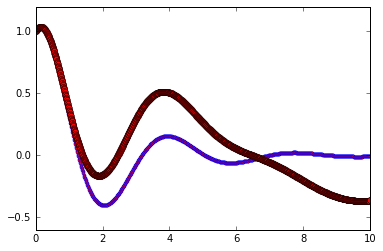

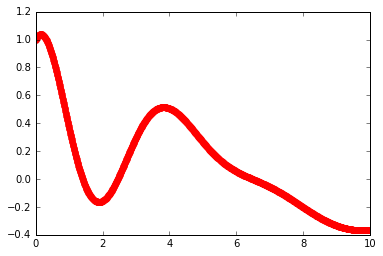

In [33]:
plt.plot(tv,yv[0,:],'.-',tv,yAnalytical,'ro',mfc='red')
plt.figure()
plt.plot(tv,yAnalytical,'ro',mec='red')

In [ ]:
%%cython
cimport numpy
import numpy
cpdef SMDsinhalft(t,x0,dx0,m,c,k):
    t1 = 0.1e1 / m;
    t2 = c * c;
    t3 = k * m;
    t6 = numpy.sqrt(t2 - 0.4e1 * t3);
    t11 = numpy.exp(t * (-c + t6) * t1 / 0.2e1);
    t13 = k * k;
    t16 = m * m;
    t18 = 0.1e1 / (0.4e1 * t2 + 0.16e2 * t13 - 0.8e1 * t3 + t16);
    t20 = 0.1e1 / t6;
    t23 = 0.4e1 * x0 * t2 * t6;
    t26 = 0.16e2 * x0 * t13 * t6;
    t28 = m * x0;
    t30 = 0.8e1 * t28 * k * t6;
    t32 = x0 * t16 * t6;
    t35 = 0.4e1 * x0 * t2 * c;
    t38 = 0.8e1 * m * dx0 * t2;
    t41 = 0.16e2 * x0 * t13 * c;
    t44 = 0.8e1 * t28 * c * k;
    t46 = x0 * t16 * c;
    t49 = 0.32e2 * m * t13 * dx0;
    t52 = 0.16e2 * t16 * k * dx0;
    t55 = 0.2e1 * t16 * m * dx0;
    t57 = 0.8e1 * c * t6;
    t58 = 0.8e1 * t2;t59 = 0.16e2 * t3;
    t60 = 0.4e1 * t16;
    t61 = t23 + t26 - t30 + t32 + t35 + t38 + t41 - t44 + t46 + t49 - t52 + t55 + t57 + t58 - t59 + t60;
    t69 = numpy.exp(-t * t1 * (c + t6) / 0.2e1);
    t70 = -t23 - t26 + t30 - t32 + t35 + t38 + t41 - t44 + t46 + t49 - t52 + t55 - t57 + t58 - t59 + t60;
    t78 = t / 0.2e1;
    t79 = numpy.sin(t78);
    t81 = numpy.cos(t78);
    t86 = t61 * t20 * t18 * t11 / 0.2e1 - t18 * t20 * t70 * t69 / 0.2e1 + t18 * (t79 * (0.16e2 * k - 0.4e1 * m) - 0.8e1 * c * t81);
    
    return t86


In [ ]:
SMDsinhalft(0., 1., 0.5, 1., 1., 3.)

# symbolic solution

In [ ]:
import sympy

In [ ]:
sympy.init_printing(use_latex=True)

In [ ]:
m,c,k,x,t,u = sympy.symbols('m c k x t u')

ICs are entered
```
ics  = {f(point}: value, f(point).diff(point, order).subs(arg, point) :value
```

In [ ]:
EQs = sympy.Eq(m*x(t).diff(t,t)+c*x(t).diff(t)+k*x(t),u(t))
ICs = {x(0): 1.0,
       x(t).diff(t).subs(t,0) : 0.5}       
#    {f(x0): x1, f(x).diff(x).subs(x, x2): x3} an

In [ ]:
EQs

In [ ]:
ICs

In [ ]:
x(t).subs({t:0.5})

In [ ]:
sol=sympy.dsolve(EQs,x(t),ics=ICs)

In [ ]:
sol

In [ ]:
sol0 = sol.subs({c:1,m:1,k:3,u(t):sympy.sin(0.2*t)})

In [ ]:
sol0

In [ ]:
sol0 = sympy.dsolve(EQs.subs({u(t):sympy.sin(0.2*t)}))

In [ ]:
sol0

In [ ]:
sol0.subs({c:1,m:1,k:3})

In [ ]:
sympy.re(sol0.rhs)

In [ ]:
xv = numpy.empty([nx,nt], numpy.float64)

In [ ]:
xv.shape

In [ ]:
xv = numpy.zeros((nx,nt), numpy.float64)

In [ ]:
xv.shape

In [ ]:
xv[:,0] = [1,2]

In [ ]:
xv